<a href="https://colab.research.google.com/github/SaraZachi/Modelo-Previsao_COVID19/blob/main/Notebooks/01_Primeiras_an%C3%A1lises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.1. Primeiros passos**

In [ ]:
# Importando Bibliotecas
import pandas as pd

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Removendo avisos
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [ ]:
# Importando Dataframe
url = 'https://github.com/marcelobin/BootCamp-Data-Science---Alura/blob/main/Projeto%20-%20M%C3%B3dulo%203%20-%20S%C3%A9ries%20Temporais/dados/caso_full.zip?raw=true'
dados = pd.read_csv(url, sep = ',', compression='zip')
dados

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0000,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0000,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0000,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0000,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0000,0,3,city,AC,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281163,Tupirama,1721257.0,2021-06-20,202125,1922.0,1891.0,False,True,160,8324.66181,2021-06-18,0.0125,2,394,city,TO,0,0
2281164,Tupiratins,1721307.0,2021-06-20,202125,2729.0,2671.0,False,True,150,5496.51887,2021-06-18,0.0200,3,394,city,TO,0,0
2281165,Wanderlândia,1722081.0,2021-06-20,202125,11734.0,11683.0,False,True,878,7482.52940,2021-06-18,0.0171,15,419,city,TO,0,0
2281166,Xambioá,1722107.0,2021-06-20,202125,11520.0,11540.0,False,True,2223,19296.87500,2021-06-18,0.0130,29,408,city,TO,0,0


* Fonte: Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e equipe de voluntários [Brasil.IO](https://brasil.io/home/)
* Brasil.IO: boletins epidemiológicos da COVID-19 por município por dia, disponível em: https://brasil.io/dataset/covid19/caso_full/ (última atualização: 02 de Julho de 2021, acesso em 02 de Julho de 2021).

# **1.2. Avaliando o DF**

Antes de tudo, vamos conhecer nosso banco de dados.

Vamos começar avaliando o número de casos confirmados (last_available_confirmed) por estado (state) brasileiro e por cidade (city):

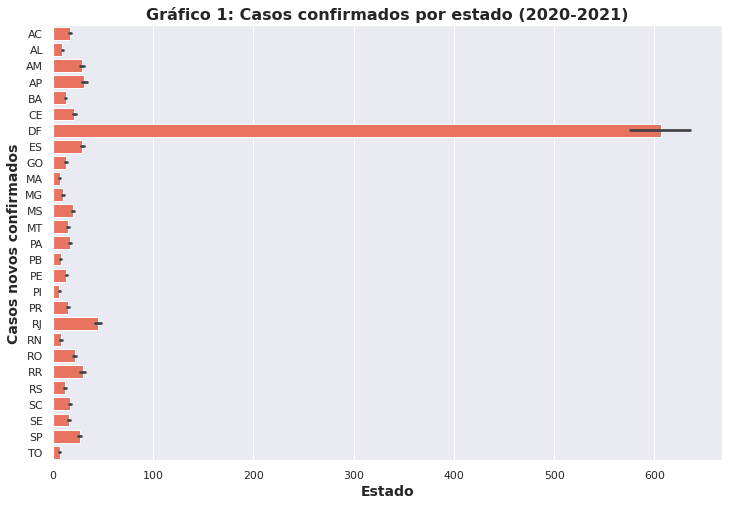

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dados, x='new_confirmed', y='state', color='tomato')

# Title and labels
ax.set_xlabel('Estado', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Casos novos confirmados', fontsize = 14, fontweight = 'bold')
ax.set_title('Gráfico 1: Casos confirmados por estado (2020-2021)', fontsize=16, fontweight='bold')

plt.show()

A partir do gráfico acima, podemos ver que o estado com o maior número de casos por COVID-19 des de 2020 é o Distrito Federal (DF)

Vamos agora observar o numero de casos para cada 100K habitantes para cada estado brasileiro por cidade:

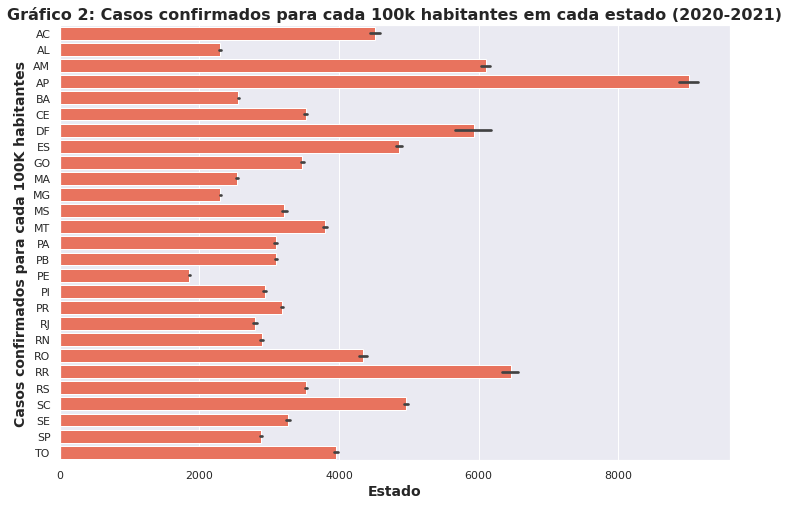

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dados, x='last_available_confirmed_per_100k_inhabitants', y='state', color='tomato')

# Title and labels
ax.set_xlabel('Estado', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Casos confirmados para cada 100K habitantes', fontsize = 14, fontweight = 'bold')
ax.set_title('Gráfico 2: Casos confirmados para cada 100k habitantes em cada estado (2020-2021)', fontsize=16, fontweight='bold')

plt.show()

A partir do gráfico 2, vemos que o estado com maior número de casos por 100K habitantes é o Paraná (PA) e o estado com menor número de casos por cada 100K habitantes é Pernambuco (PE). Deste modo, iremos utilizar o PA e PE para realizarmos uma previão das séries temporais com a Facebook Prophet e comparar os resultados.

Vamos averiguar se o crescimento do número de casos acima é exponencial. 

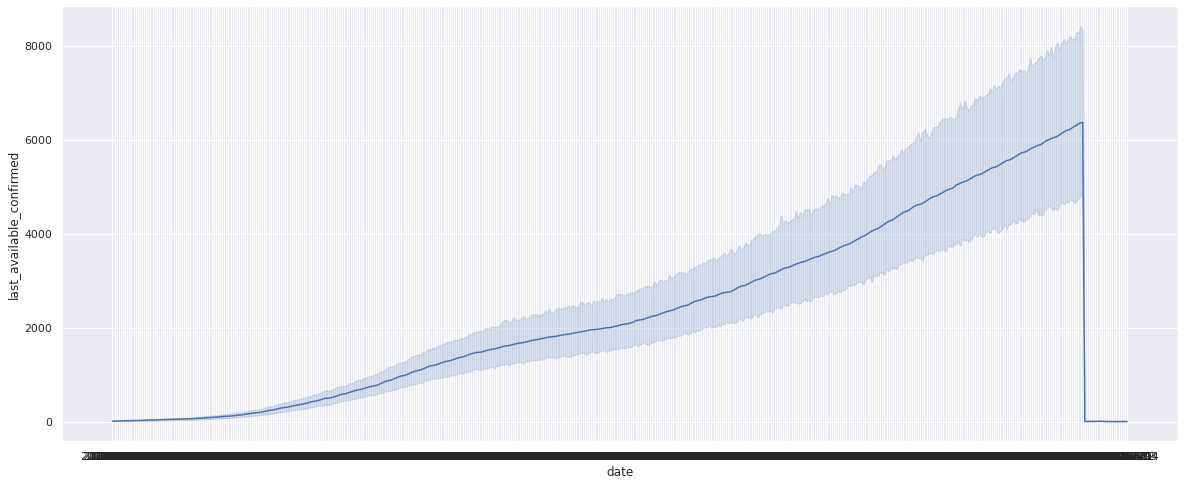

In [ ]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (20,8)
sns.lineplot(x='date', y='last_available_confirmed', data=dados)

# Title and labels
ax.set_xlabel('Estado', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Casos confirmados para cada 100K habitantes', fontsize = 14, fontweight = 'bold')
ax.set_title('Gráfico 2: Casos confirmados para cada 100k habitantes em cada estado (2020-2021)', fontsize=16, fontweight='bold')

sns.set()
plt.show()

A partir do gráfico 2, entende-se que o estado com maior número de casos (para cada 100K habitantes) é o Amapá (AP) e o estado com menor número de casos é o Pernambuco (PE). Além disso, o gráfico 3 nos mostra uma série temporal para nosso banco de dados. Dito isso, iremos realizar um modelo de machinelearning para ambos os estados e compará-los para averiguar se haverão sasonalidades diferentes, ou não.